In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data/Phishing_Legitimate_full.csv')
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [5]:
# Dependent and independent differentiate
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
y.value_counts()

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64

In [7]:
X.shape

(10000, 48)

In [8]:
y.shape

(10000,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# first logistic regression
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
lr=LogisticRegression(max_iter=100)
lrc=LogisticRegressionCV()

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
lr.fit(X_train,y_train)

E:\ML_IMPLEMENTATIO\ml-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred=lr.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,precision_score,classification_report

In [18]:
accuracy_score(y_test,y_pred)

0.917

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       988
           1       0.92      0.92      0.92      1012

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [20]:
lrc.fit(X_train,y_train)

E:\ML_IMPLEMENTATIO\ml-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ML_IMPLEMENTATIO\ml-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LogisticRegressionCV()

In [24]:
y_pred=lrc.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred)

0.9395

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt=DecisionTreeClassifier()

In [28]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
dt_pred=dt.predict(X_test)

In [30]:
accuracy_score(y_test,dt_pred)

0.9725

In [31]:
dt_hyper=DecisionTreeClassifier()

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# Define the hyperparameter grid for pruning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_leaf_nodes': [None, 10, 20],
    'ccp_alpha': [0.0, 0.01, 0.1]
}




In [35]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_hyper, param_grid, cv=5, scoring='accuracy')


In [36]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [37]:
grid_search.best_params_

{'ccp_alpha': 0.0,
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [38]:
dt_pred_hpt=grid_search.predict(X_test)

In [39]:
accuracy_score(y_test,dt_pred_hpt)

0.974

In [41]:
print(classification_report(y_test,dt_pred_hpt))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       988
           1       0.98      0.97      0.97      1012

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

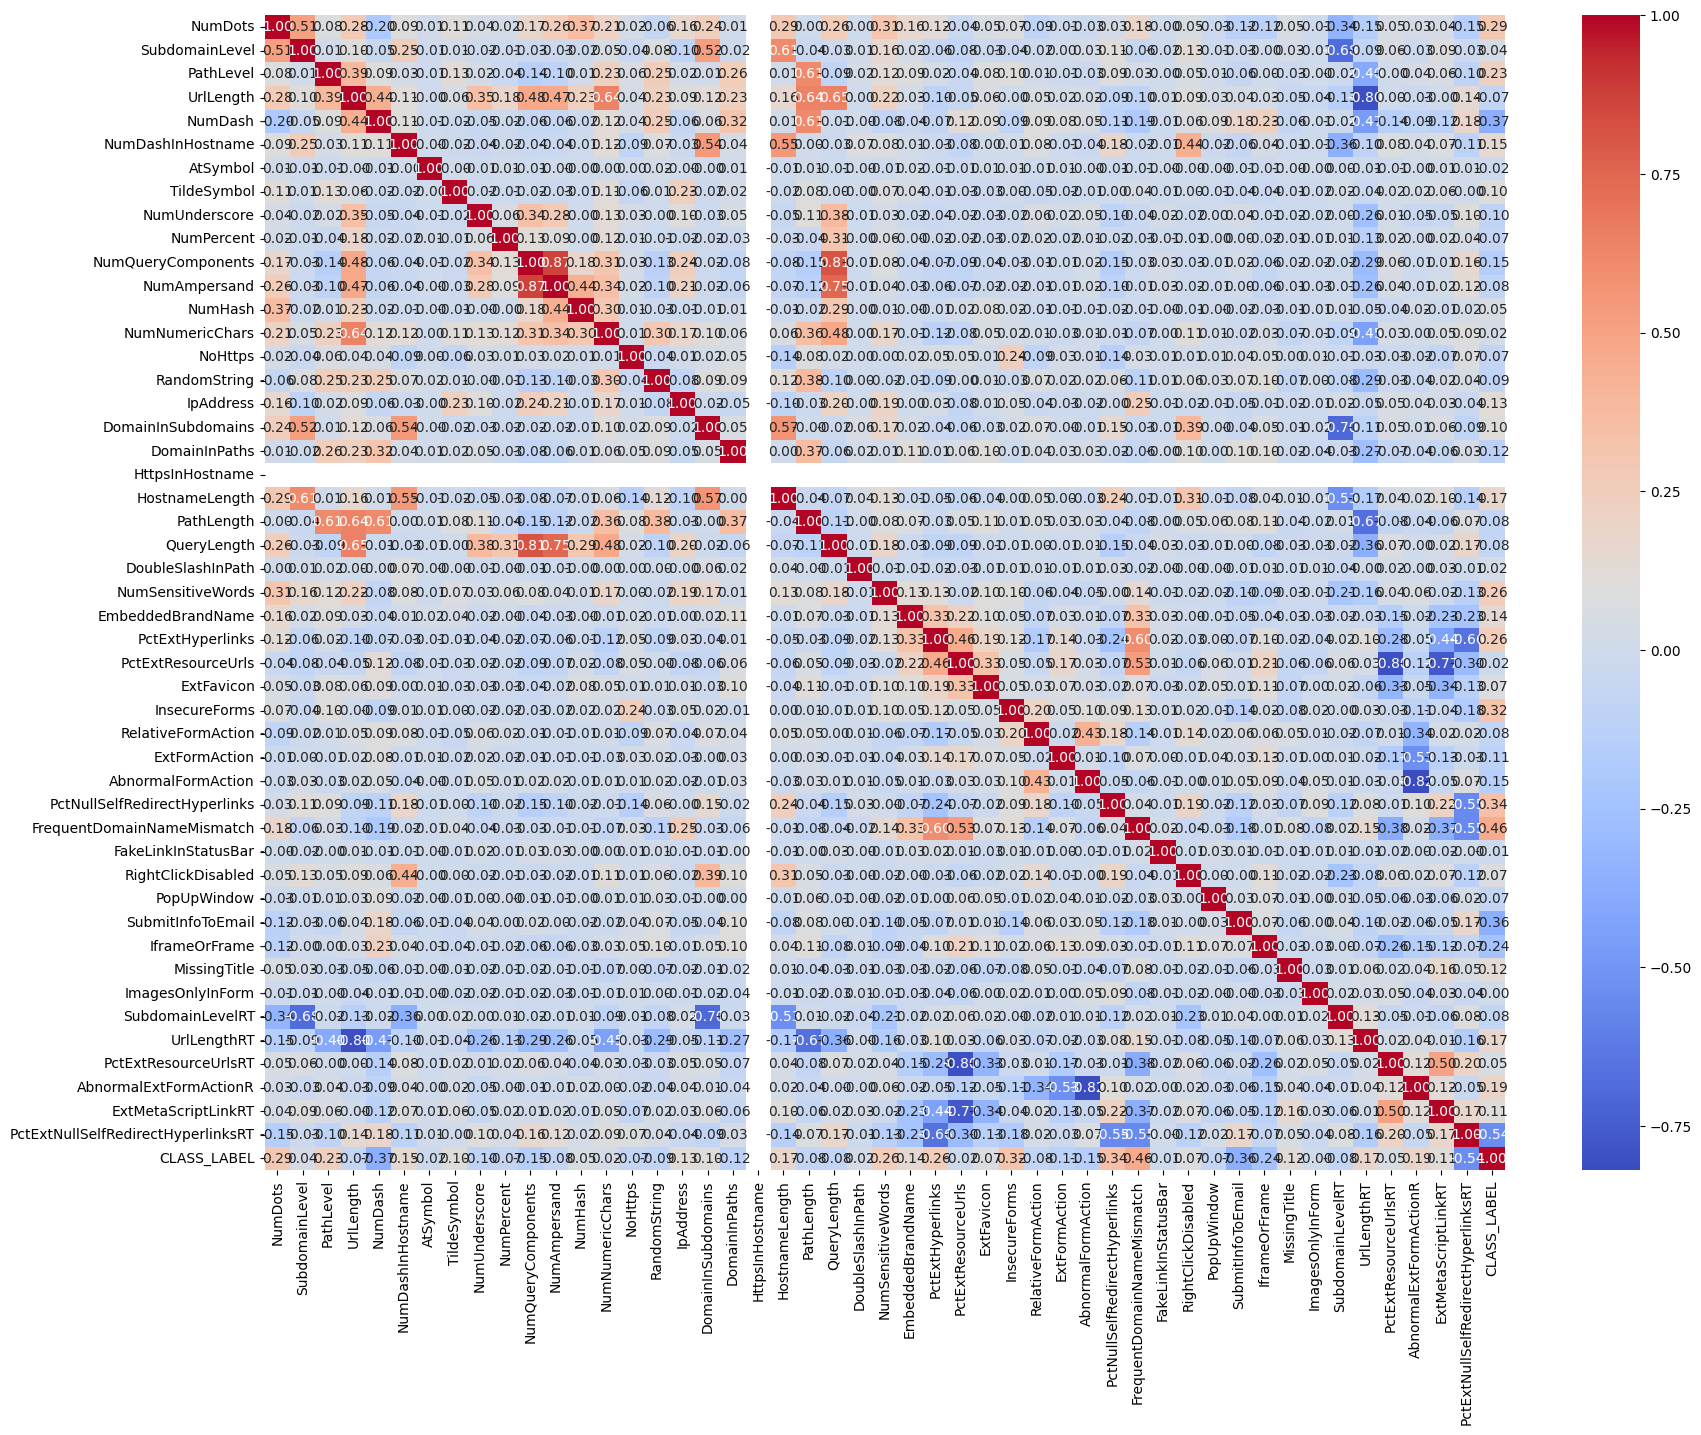

In [51]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr().round(2),annot=True,cmap='coolwarm', fmt='.2f')

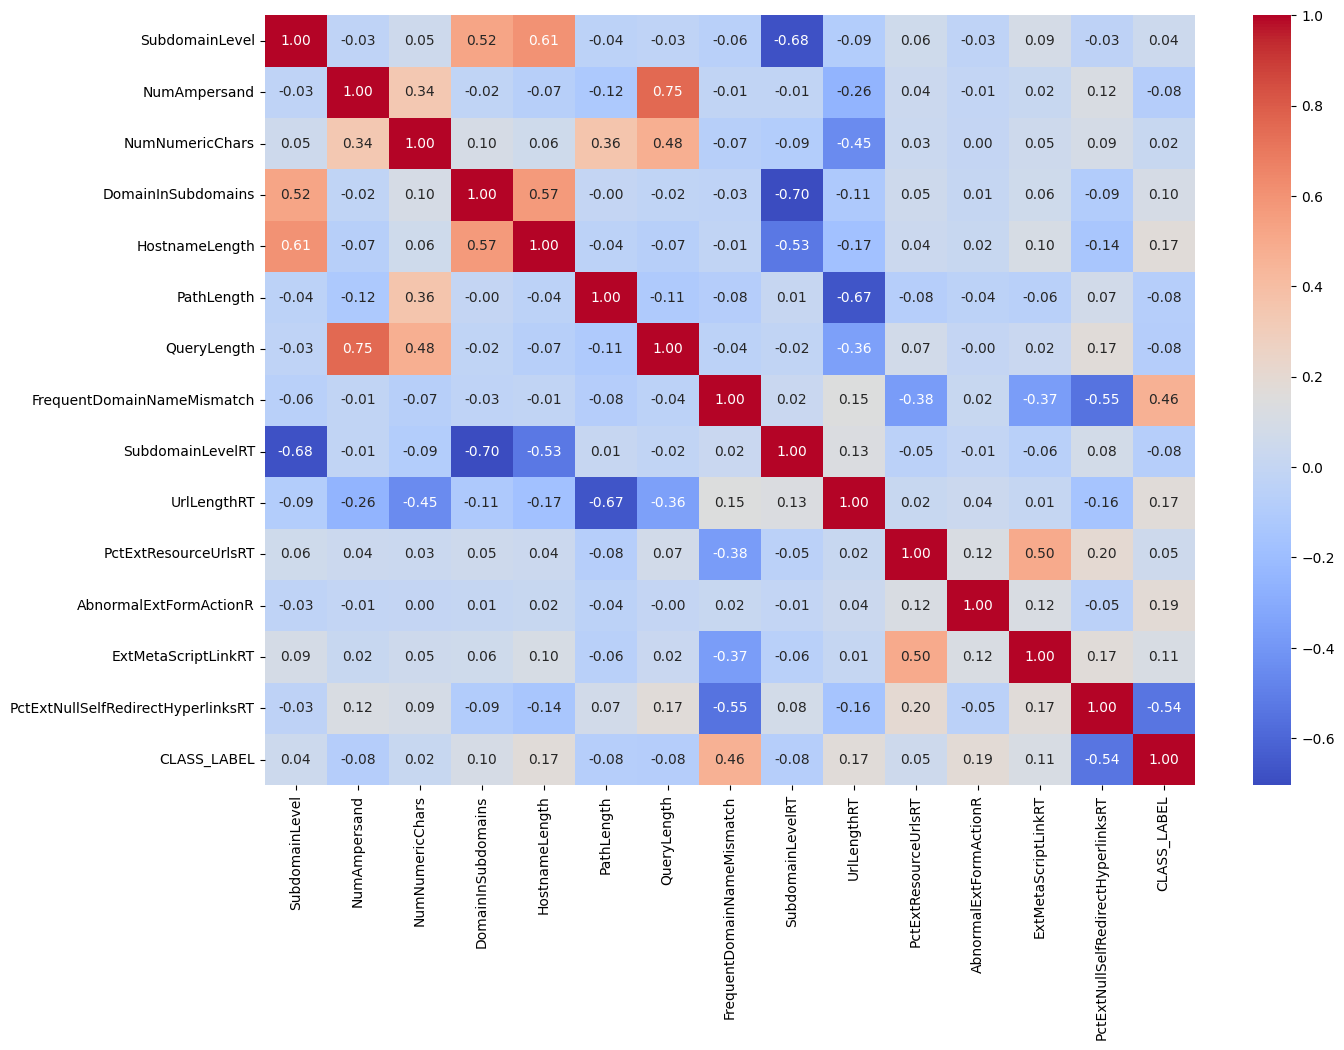

In [52]:
corr_matrix = df.corr().abs()

# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Plot the heatmap with the filtered columns
plt.figure(figsize=(15, 10))
sns.heatmap(df[to_drop].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca=PCA()

In [ ]:
pca.fit()